# Restaurant Ratings x US Obesity

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Import stats for ttest analysis
import scipy.stats as stats

In [2]:
# Verify library versions if some error occurs

#pd.__version__ # Pandas version: 0.23.4
#np.__version__ # Numpy version: 1.15.4
#import matplotlib as mat
#mat.__version__ # Matplotlib version: 3.0.2

## Obesity Data Analysis

In [3]:
# Read in df_us csv
input_file = os.path.join('data','df_us.csv')
df_us = pd.read_csv(input_file)

# Display the Data
df_us

,Year,Location,Obesity Percentage
0,2011,US,27.4
1,2012,US,27.7
2,2013,US,28.3
3,2014,US,28.9
4,2015,US,28.9
5,2016,US,29.6
6,2017,US,30.1


In [4]:
# Read in df_ageyr_us csv
input_file = os.path.join('data','df_ageyr_us.csv')
df_ageyr_us = pd.read_csv(input_file)

# Display the Data
df_ageyr_us.head()

,Year,Location,Age Bin,Obesity Percentage
0,2017,US,18 - 24,16.5
1,2017,US,35 - 44,33.0
2,2017,US,55 - 64,35.4


### Plot US Obesity Data: Overall and by Age

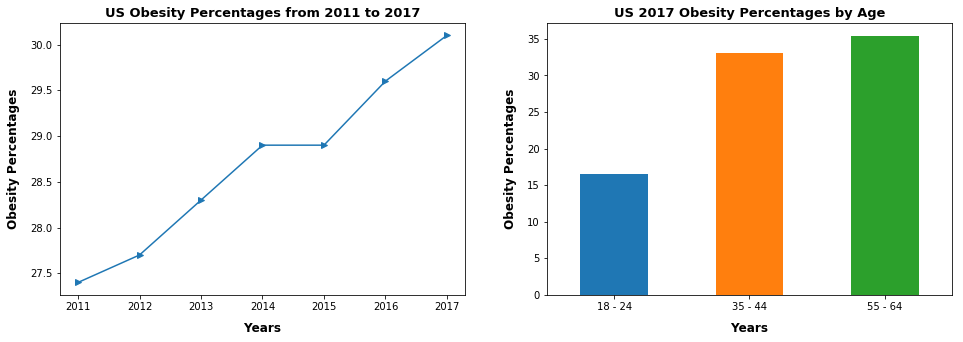

In [5]:
# Create subplot figure
fig, ax = plt.subplots(1, 2, figsize = (16,5))

# Plot data for US
df_us.plot(x = "Year", y = "Obesity Percentage", ax = ax[0], marker = ">", legend = None)
df_ageyr_us.plot(kind = 'bar', x = "Age Bin", y = "Obesity Percentage", ax = ax[1], legend = None)

# Insert labels
ax[0].set_title("US Obesity Percentages from 2011 to 2017", size = 13, weight = 'bold')
ax[0].set_xlabel("Years", labelpad=10, size = 12,  weight = 'bold')
ax[0].set_ylabel("Obesity Percentages", labelpad=10, size = 12, weight = 'bold')

ax[1].set_title("US 2017 Obesity Percentages by Age", size = 13, weight = 'bold')
ax[1].set_xlabel("Years", labelpad=10, size = 12,  weight = 'bold')
ax[1].set_xticklabels(df_ageyr_us["Age Bin"], rotation = 0)
ax[1].set_ylabel("Obesity Percentages", labelpad=10, size = 12, weight = 'bold')

# Save Figures
figure_path = os.path.join('images','US_Obesity_Percentages')
plt.savefig(figure_path)

plt.show()

In [6]:
# Read in df_states_2017 csv
input_file = os.path.join('data','df_states_2017.csv')
df_states_2017 = pd.read_csv(input_file)

# Display the Data
df_states_2017.head()

,Year,Location,Obesity Percentage
0,2017,WV,38.1
1,2017,MS,37.3
2,2017,OK,36.5
3,2017,IA,36.4
4,2017,AL,36.3


### Plot obesity states rank: first 5 and last 5

/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


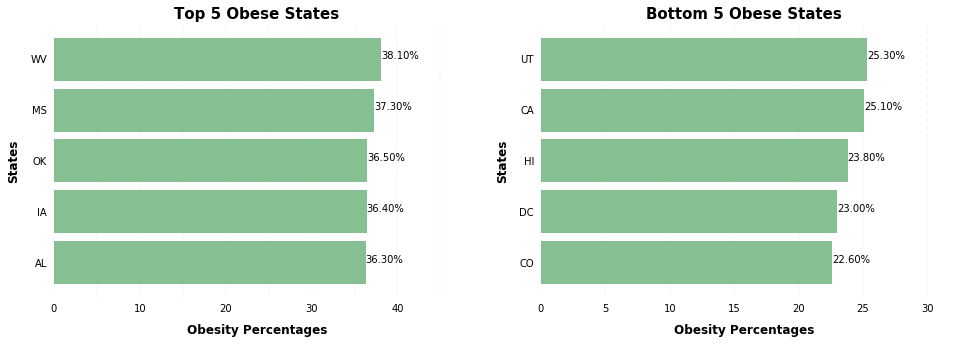

In [7]:
# Group dataframes
df_top5_states = df_states_2017.head().groupby('Location').sum()
df_top5_states = df_top5_states['Obesity Percentage'].sort_values()

df_bottom5_states = df_states_2017.tail().groupby('Location').sum()
df_bottom5_states = df_bottom5_states['Obesity Percentage'].sort_values()

# Create figure
fig, ax = plt.subplots(1,2, figsize= (16,5))

df_top5_states.plot(kind='barh', ax = ax[0], color='#86bf91', zorder=2, width=0.85)
df_bottom5_states.plot(kind='barh', ax = ax[1], color='#86bf91', zorder=2, width=0.85)

# Set Title
ax[0].set_title('Top 5 Obese States', weight = 'bold', size = 15, loc = 'center')
ax[1].set_title('Bottom 5 Obese States', weight = 'bold', size = 15, loc = 'center')

# Loop through subplots to put labels
for i in range(len(ax)):

    # Remove plotting borders
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

    # Switch off ticks
    ax[i].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw vertical axis lines
    vals = ax[i].get_xticks()
    for tick in vals:
        ax[i].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    ax[i].set_xlabel("Obesity Percentages", labelpad=10, weight='bold', size=12)

    # Set y-axis label
    ax[i].set_ylabel("States", labelpad=10, weight='bold', size=12)

# Set values on right of the bars
[ax[0].text(v, j, '{:.2f}%'.format(v)) for j, v in enumerate(df_top5_states)]
[ax[1].text(v, j, '{:.2f}%'.format(v)) for j, v in enumerate(df_bottom5_states)]
 
# Save Figures
figure_path = os.path.join('images','US_Obesity_Rankings')
plt.savefig(figure_path)
    
plt.show()

## Restaurant Ratings Data Analysis

In [8]:
# Read in state_unhealthy csv
input_file = os.path.join('data','state_unhealthy.csv')
state_unhealthy = pd.read_csv(input_file)

# Display the Data
state_unhealthy.head()

,Year,Location,Obesity Percentage,Rating Average
0,2017,WV,38.1,3.08750
1,2017,MS,37.3,2.91875
2,2017,OK,36.5,2.20625
3,2017,IA,36.4,3.01250
4,2017,AL,36.3,2.11875


In [9]:
# Read in state_healthy csv
input_file = os.path.join('data','state_healthy.csv')
state_healthy = pd.read_csv(input_file)

# Display the Data
state_healthy.head()

,Year,Location,Obesity Percentage,Rating Average
0,2017,WV,38.1,3.525000
1,2017,MS,37.3,3.170732
2,2017,OK,36.5,3.600000
3,2017,IA,36.4,3.595745
4,2017,AL,36.3,3.534091


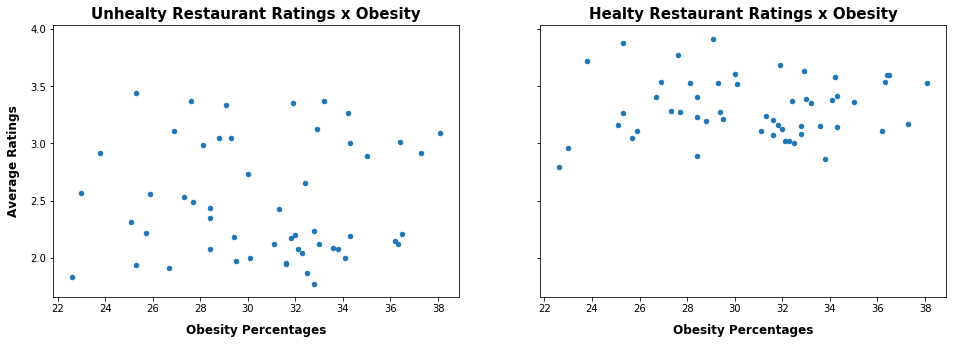

In [10]:
# Scatter plots
fig, ax = plt.subplots(1,2, figsize= (16,5), sharey = True)

state_unhealthy.plot(kind='scatter', x = 'Obesity Percentage', y = 'Rating Average', ax = ax[0])
state_healthy.plot(kind='scatter', x = 'Obesity Percentage', y = 'Rating Average', ax = ax[1])

# Set Titles
ax[0].set_title('Unhealty Restaurant Ratings x Obesity', weight = 'bold', size = 15, loc = 'center')
ax[1].set_title('Healty Restaurant Ratings x Obesity', weight = 'bold', size = 15, loc = 'center')

# Set x-axis label
ax[0].set_xlabel("Obesity Percentages", labelpad=10, weight='bold', size=12)
ax[1].set_xlabel("Obesity Percentages", labelpad=10, weight='bold', size=12)

# Set y-axis label
ax[0].set_ylabel("Average Ratings", labelpad=10, weight='bold', size=12)

# Save Figures
figure_path = os.path.join('images','US_Obesity_x_Rating')
plt.savefig(figure_path)

plt.show()

## State Ranking x Restaurant Ratings

In [11]:
# Read in TOP5HEALTHY_restaurants csv
input_file = os.path.join('data','TOP5HEALTHY_restaurants.csv')
TOP5HEALTHY_restaurants = pd.read_csv(input_file)

# Display the Data
TOP5HEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,AL,Chiptole,3.0,206
1,AL,Subway,4.0,4
2,AL,Subway,1.0,2
3,AL,Subway,2.5,5
4,AL,Subway,4.0,5


In [12]:
# Read in TOP5UNHEALTHY_restaurants csv
input_file = os.path.join('data','TOP5UNHEALTHY_restaurants.csv')
TOP5UNHEALTHY_restaurants = pd.read_csv(input_file)

# Display the Data
TOP5UNHEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,AL,McDonalds,1.5,8
1,AL,McDonalds,1.5,29
2,AL,McDonalds,1.5,31
3,AL,McDonalds,1.5,19
4,AL,McDonalds,1.5,18


In [13]:
# Read in BOTTOM5HEALTHY_restaurants csv
input_file = os.path.join('data','BOTTOM5HEALTHY_restaurants.csv')
BOTTOM5HEALTHY_restaurants = pd.read_csv(input_file)

# Display the Data
BOTTOM5HEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,CO,Chiptole,3.5,84
1,CO,Chiptole,3.0,44
2,CO,Chiptole,3.5,25
3,CO,Chiptole,3.0,33
4,CO,Chiptole,3.5,39


In [14]:
# Read in BOTTOM5UNHEALTHY_restaurants csv
input_file = os.path.join('data','BOTTOM5UNHEALTHY_restaurants.csv')
BOTTOM5UNHEALTHY_restaurants = pd.read_csv(input_file)

# Display the Data
BOTTOM5UNHEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,CO,McDonalds,2.0,57
1,CO,McDonalds,1.5,44
2,CO,McDonalds,1.5,41
3,CO,McDonalds,2.0,47
4,CO,McDonalds,2.5,5


### Hypothesis: In the Top5 obese states, do unhealthy restaurants have greater ratings than healthy restaurants?

### Null hypothesis: Unhealthy and healthy restaurants in Top5 obese states have the same ratings

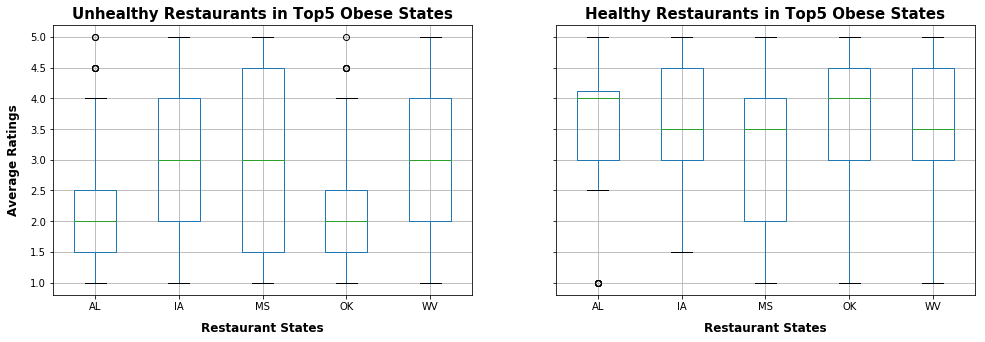

In [15]:
# Creat subplots
fig, ax = plt.subplots(1,2, figsize= (16,5), sharey = True)

# Create a boxplot to compare means for Unhealthy Restaurants in Top5 States
TOP5UNHEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[0])
TOP5HEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[1])
plt.suptitle("")

# Set Titles
ax[0].set_title('Unhealthy Restaurants in Top5 Obese States', weight = 'bold', size = 15, loc = 'center')
ax[1].set_title('Healthy Restaurants in Top5 Obese States', weight = 'bold', size = 15, loc = 'center')

# Set x-axis label
ax[0].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)
ax[1].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)

# Set y-axis label
ax[0].set_ylabel("Average Ratings", labelpad=10, weight='bold', size=12)

# Save Figures
figure_path = os.path.join('images','Top5_Healthy_x_Unhealthy_Boxplot')
plt.savefig(figure_path)

plt.show()

In [16]:
# Test if the ratings are different
results =stats.ttest_ind(TOP5HEALTHY_restaurants["Restaurant Rating"], 
                         TOP5UNHEALTHY_restaurants["Restaurant Rating"], equal_var=False)
print(f"Statistic value: {results.statistic:.4f}")
print(f"P-value value: {results.pvalue:.16f}")

Statistic value: 8.5263
P-value value: 0.0000000000000002


### Based on the pvalue of the Ttest, we reject the null hypothesis, so Healthy and Unhealthy restaurants in Top5 Obese States have different rating averages.
### Based on the statistic value of the Ttest, we notice that Healthy restaurants have greater Ratings than Unhealthy restaurants in Top5 Obese States.
# ----------------------------------------------------------------------------------------

### Hypothesis: In the Bottom5 obese states, do healthy restaurants have greater ratings than unhealthy restaurants?

### Null hypothesis: Unhealthy and healthy restaurants in Bottom5 obese states have the same ratings

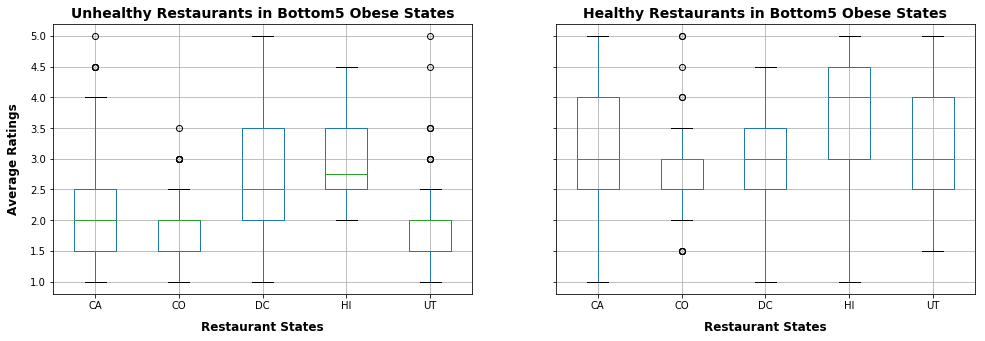

In [17]:
# Creat subplots
fig, ax = plt.subplots(1,2, figsize= (16,5), sharey = True)

# Create a boxplot to compare means for Unhealthy Restaurants in Bottom5 States
BOTTOM5UNHEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[0])
BOTTOM5HEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[1])
plt.suptitle("")

# Set Titles
ax[0].set_title('Unhealthy Restaurants in Bottom5 Obese States', weight = 'bold', size = 14, loc = 'center')
ax[1].set_title('Healthy Restaurants in Bottom5 Obese States', weight = 'bold', size = 14, loc = 'center')

# Set x-axis label
ax[0].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)
ax[1].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)

# Set y-axis label
ax[0].set_ylabel("Average Ratings", labelpad=10, weight='bold', size=12)

# Save Figures
figure_path = os.path.join('images','Bottom5_Healthy_x_Unhealthy_Boxplot')
plt.savefig(figure_path)

plt.show()

In [18]:
# Test if the ratings are different
results = stats.ttest_ind(BOTTOM5HEALTHY_restaurants["Restaurant Rating"], 
                          BOTTOM5UNHEALTHY_restaurants["Restaurant Rating"], equal_var=False)
print(f"Statistic value: {results.statistic:.4f}")
print(f"P-value value: {results.pvalue:.16f}")

Statistic value: 12.7561
P-value value: 0.0000000000000000


### Based on the pvalue of the Ttest, we reject the null hypothesis, so Healthy and Unhealthy restaurants in Bottom5 Obese States have different rating averages.
### Based on the statistic value of the Ttest, we notice that Healthy restaurants have greater Ratings than Unhealthy restaurants in Bottom5 Obese States.
# ----------------------------------------------------------------------------------------

### Hypothesis: For unhealthy restaurants, the Top5 obese states have greater ratings than the Bottom5 obese states?

### Null hypothesis: Unhealthy restaurants in Top5 and Bottom5 obese states have the same ratings

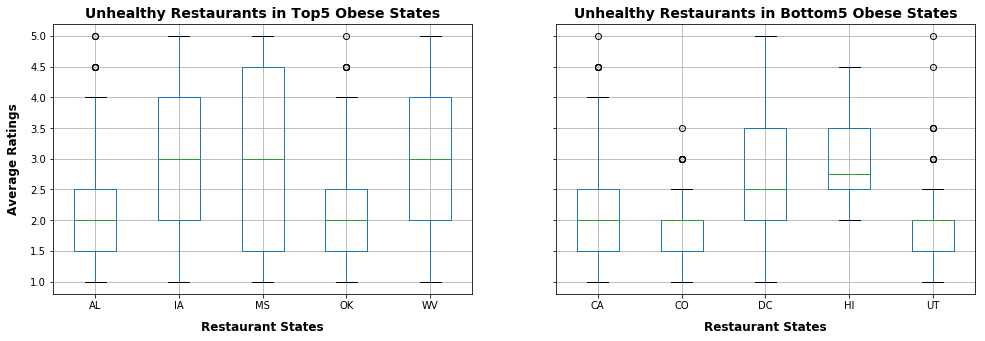

In [19]:
# Creat subplots
fig, ax = plt.subplots(1,2, figsize= (16,5), sharey = True)

# Create a boxplot to compare means for Unhealthy Restaurants in Top5 and Bottom5 States
TOP5UNHEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[0])
BOTTOM5UNHEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[1])
plt.suptitle("")

# Set Titles
ax[0].set_title('Unhealthy Restaurants in Top5 Obese States', weight = 'bold', size = 14, loc = 'center')
ax[1].set_title('Unhealthy Restaurants in Bottom5 Obese States', weight = 'bold', size = 14, loc = 'center')

# Set x-axis label
ax[0].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)
ax[1].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)

# Set y-axis label
ax[0].set_ylabel("Average Ratings", labelpad=10, weight='bold', size=12)

# Save Figures
figure_path = os.path.join('images','Unhealthy_Top5_x_Bottom5_Boxplot')
plt.savefig(figure_path)

plt.show()

In [20]:
# Test if the ratings are different
results = stats.ttest_ind(TOP5UNHEALTHY_restaurants["Restaurant Rating"], 
                          BOTTOM5UNHEALTHY_restaurants["Restaurant Rating"], equal_var=False)
print(f"Statistic value: {results.statistic:.4f}")
print(f"P-value value: {results.pvalue:.16f}")

Statistic value: 4.7538
P-value value: 0.0000024054616908


### Based on the pvalue of the Ttest, we reject the null hypothesis, so Unhealthy restaurants in Top5 and Bottom5 Obese States have different rating averages.
### Based on the statistic value of the Ttest, we notice that unhealthy restaurants have greater Ratings in Top5 obese states than in Bottom5 Obese States.
# ----------------------------------------------------------------------------------------

### Hypothesis: For healthy restaurants, the Bottom5 obese states have greater ratings than the Top5 obese states.

### Null hypothesis: Healthy restaurants in Top5 and Bottom5 obese states have the same ratings

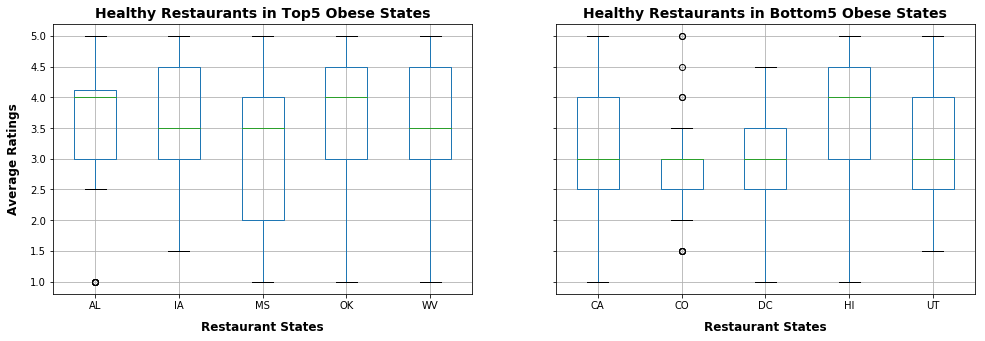

In [21]:
# Creat subplots
fig, ax = plt.subplots(1,2, figsize= (16,5), sharey = True)

# Create a boxplot to compare means for Healthy Restaurants in Top5 and Bottom5 States
TOP5HEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[0])
BOTTOM5HEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", ax = ax[1])
plt.suptitle("")

# Set Titles
ax[0].set_title('Healthy Restaurants in Top5 Obese States', weight = 'bold', size = 14, loc = 'center')
ax[1].set_title('Healthy Restaurants in Bottom5 Obese States', weight = 'bold', size = 14, loc = 'center')

# Set x-axis label
ax[0].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)
ax[1].set_xlabel("Restaurant States", labelpad=10, weight='bold', size=12)

# Set y-axis label
ax[0].set_ylabel("Average Ratings", labelpad=10, weight='bold', size=12)

# Save Figures
figure_path = os.path.join('images','Healthy_Top5_x_Bottom5_Boxplot')
plt.savefig(figure_path)

plt.show()

In [22]:
# Test if the ratings are different
results = stats.ttest_ind(TOP5HEALTHY_restaurants["Restaurant Rating"], 
                          BOTTOM5HEALTHY_restaurants["Restaurant Rating"], equal_var=False)
print(f"Statistic value: {results.statistic:.4f}")
print(f"P-value value: {results.pvalue:.16f}")

Statistic value: 3.8043
P-value value: 0.0001649588692480


### Based on the pvalue of the Ttest, we reject the null hypothesis, so Healthy restaurants in Top5 and Bottom5 Obese States have different rating averages.
### Based on the statistic value of the Ttest, we notice that healthy restaurants have greater Ratings in Top5 obese states than in Bottom5 Obese States.